In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X = np.arange(-10, 10, 0.8)
Y = np.arange(-10, 10, 0.8)
X, Y = np.meshgrid(X, Y)
Z = (X**2 + Y**2)

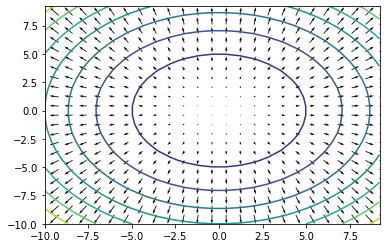

In [3]:
plt.contour(X, Y, Z)
dhdy, dhdx = np.gradient(Z)
plt.quiver(X, Y, dhdx, dhdy);

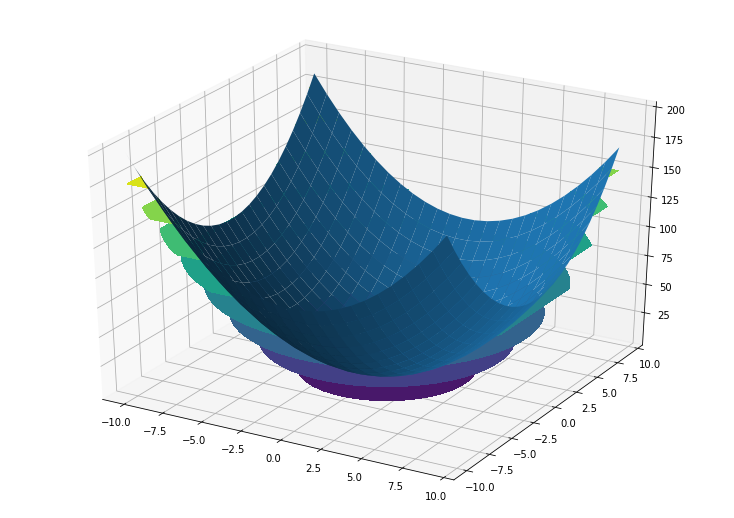

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
ax.contourf(X, Y, Z);

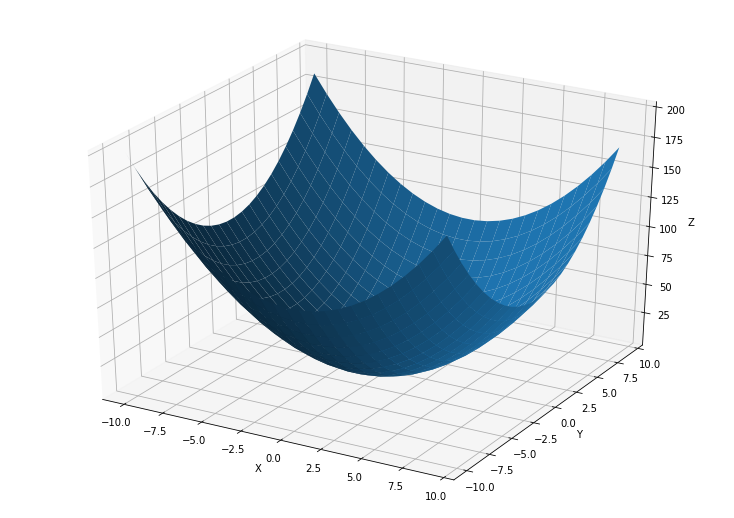

In [5]:
fig = plt.figure(figsize = (10, 7))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

# **Regresión lineal con Scikit-learn**

# BOSTON DATASET

**Regresión ND**

**Problema**: Predecir el precio de una casa en base a información existente en una base de datos.

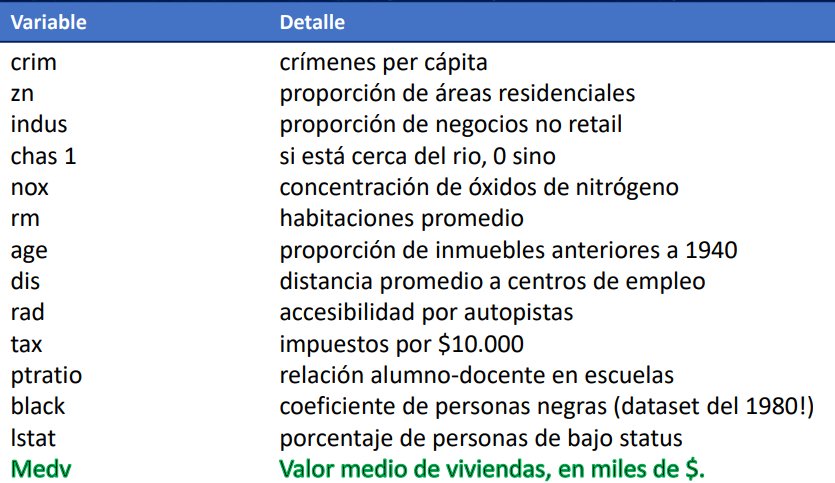

**CARGAR DATASET y separar datos (x) de target (y)**

In [6]:
data= pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/boston.csv")
x= data.drop('medv', axis=1)
y= data['medv']

**Boston dataset – histogramas por variable**

Visualizar distribución de los features

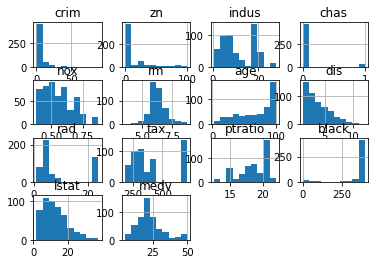

In [7]:
data.hist();

Crear modelo de regresión lineal

In [8]:
from sklearn.linear_model import LinearRegression
modelo= LinearRegression()

Entrenamiento de un modelo

In [9]:
modelo.fit(x, y)

LinearRegression()

Utilizar el modelo entrenado para predecir nuevos valores


In [10]:
y_predict= modelo.predict(x)

Calculo del error del modelo

Calculamos el error cuadrático medio y el error absoluto medio para el modelo entrenado

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_error= mean_squared_error(y_predict, y)
print("Error cuad. medio: %.2f" % mse_error)
mae_error= mean_absolute_error(y_predict, y)
print("Error abs. medio: %.2f" % mae_error)

Error cuad. medio: 21.89
Error abs. medio: 3.27


**Coeficientes del modelo**

Sklearn pone un guión bajo a todas las variables que derivan de los datos de entrenamiento (para no confundir con parámetros del usuario).

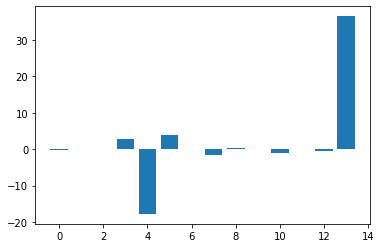

In [12]:
w= modelo.coef_
b= modelo.intercept_
d = x.shape[1]
plt.bar(range(d+1), np.concatenate((w,[b])));

Llamamos “modelo de caja blanca” a regresión lineal ya que es posible interpretar los coeficientes. Podemos verificar si cada variable influye positiva o negativamente en el precio, pero los valores no son comparables, ya que las variables no están normalizadas.

**Coeficientes del modelo – Variables normalizadas**

Normalizamos las variables con z-core

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x= scaler.transform(x)